# BASEBALL WINNER PREDICTION PROJECT 

**PROBLEM STATEMENT**

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

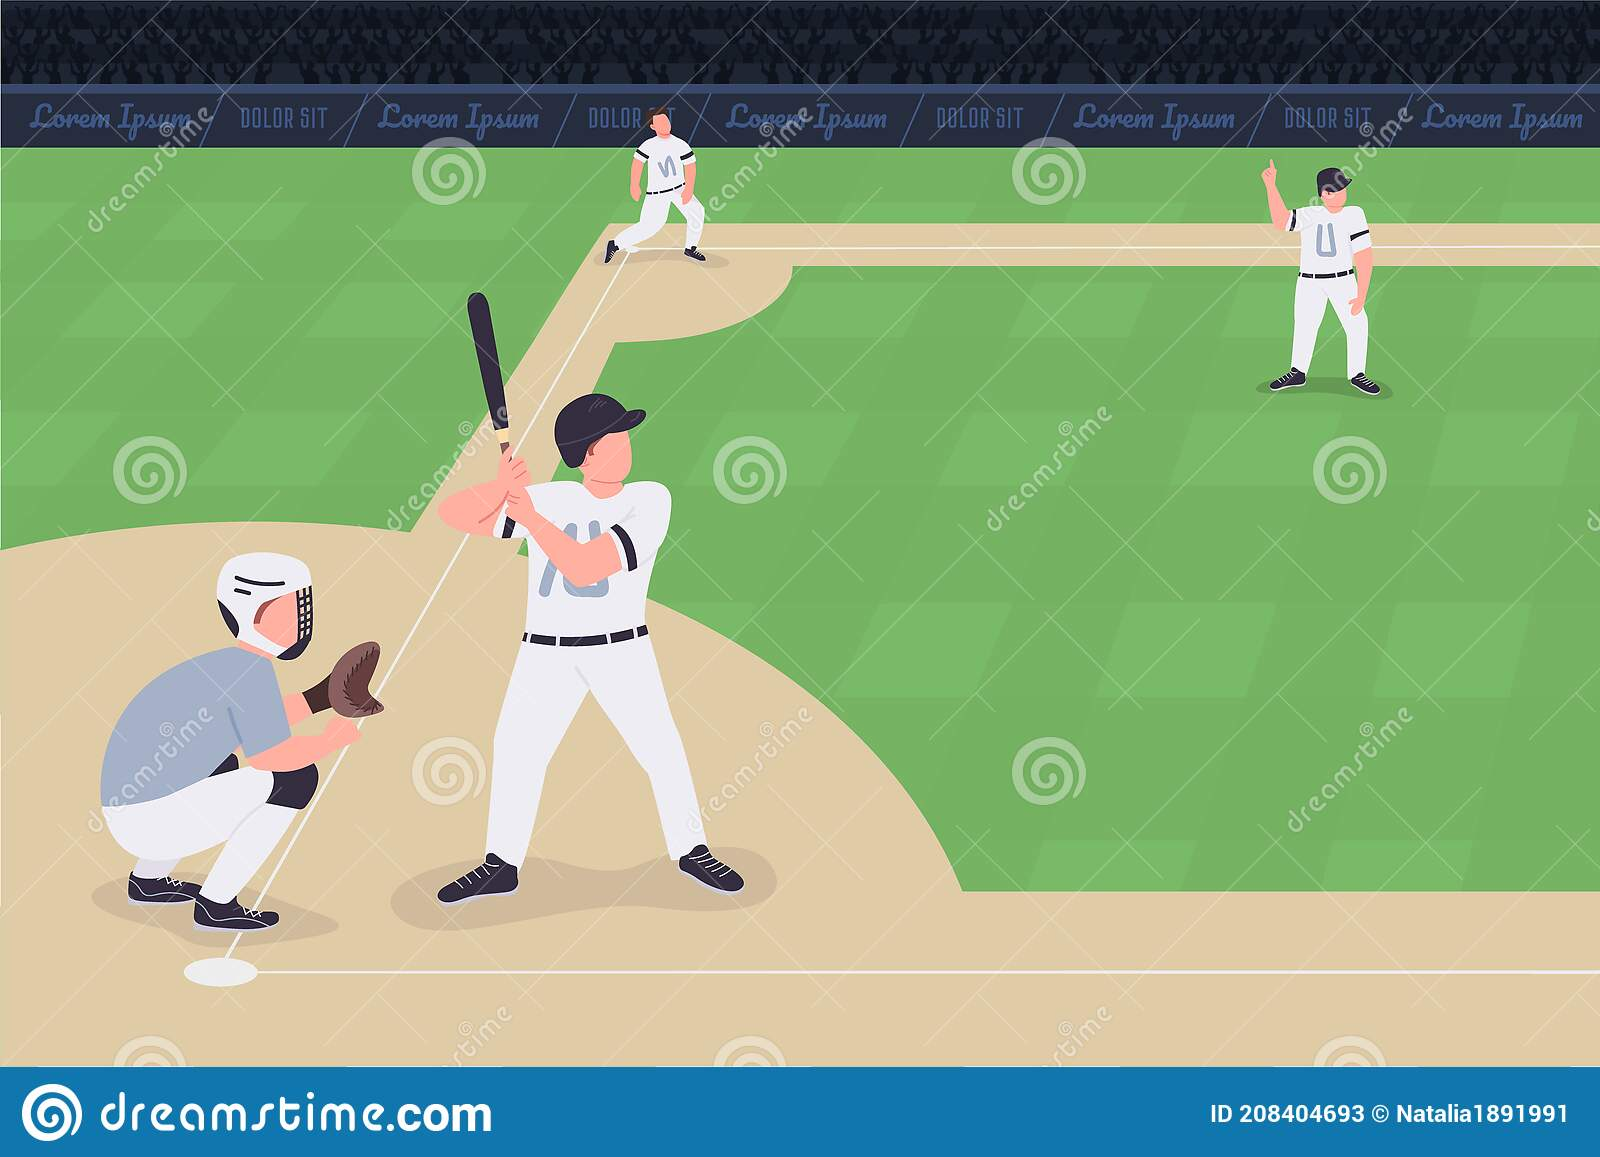

image source :- www.dreamstime.com 

## Step 1 Importing Libraries and Reading Data

In [135]:
#importing numpy and panda
import numpy as np
import pandas as pd


#for visualization
import seaborn as sns
import matplotlib.pyplot as plt


#for building models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

#splitting of data
from sklearn.model_selection import train_test_split

#EDA
from scipy.stats import zscore #outliers
from sklearn.preprocessing import power_transform  #skewness 
from statsmodels.stats.outliers_influence import variance_inflation_factor #multi-collinearity

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [136]:
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"

df = pd.read_csv(url)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<pre><code>Column Description  
    1) W - Number of predicted wins  
    2) R - Runs  
    3) AB - At Balls  
    4) H - Hits  
    5) 2B - Doubles  
    6) 3B - Triples  
    7) HR - Home Runs  
    8) BB - Base on Balls  
    9) SO - Strike Outs  
    10) SB - Stolen Bases  
    11) RA - Runs Allowed  
    12) ER - Earned Runs   
    13) ERA - Earned Runs Average  
    14) CG - Complete Games  
    15) SHO - SHoutOuts  
    16) SV - Saves  
    17) E - Errors

## Step 2 - Basic data information  

In [137]:
#Renaming Data columns 


df.rename(columns={'W': 'wins',
                   'R': ' Runs',
                  'AB': 'At Balls',
                   'H': 'Hits',
                  '2B': 'doubles',
                   '3B': 'Triples',
                  'HR': 'Homeruns',
                   'BB': 'Base on balls',
                  'SO': 'Strikeouts',
                   'SB': 'Stolen Bases',
                  'RA': 'Runs Allowed',
                   'ER': 'Earned Runs',
                  'ERA': 'Earned Run Average',
                  'CG': 'Complete Games',
                   'SHO': 'Shutouts',
                  'SV': 'Saves',
                  'E': 'Errors'},
          inplace=True, errors='raise')

In [138]:
df.shape

(30, 17)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wins                30 non-null     int64  
 1    Runs               30 non-null     int64  
 2   At Balls            30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Base on balls       30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [140]:
df.describe()

,wins,Runs,At Balls,Hits,doubles,Triples,Homeruns,Base on balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [141]:
df.dtypes

wins                    int64
 Runs                   int64
At Balls                int64
Hits                    int64
doubles                 int64
Triples                 int64
Homeruns                int64
Base on balls           int64
Strikeouts              int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
Complete Games          int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

In [142]:
df.isnull().sum()

wins                  0
 Runs                 0
At Balls              0
Hits                  0
doubles               0
Triples               0
Homeruns              0
Base on balls         0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

<pre><code>OBSERVATIONS  
    1) Number of rows = 30  
    2) Number of columns = 17  
    3) Values are present in two data types. Earned runs average(ERA) is in float. Rest all are Integer  
    4) There are NO NULL values present  


## Step 3 - Exploratory Data Analysis  

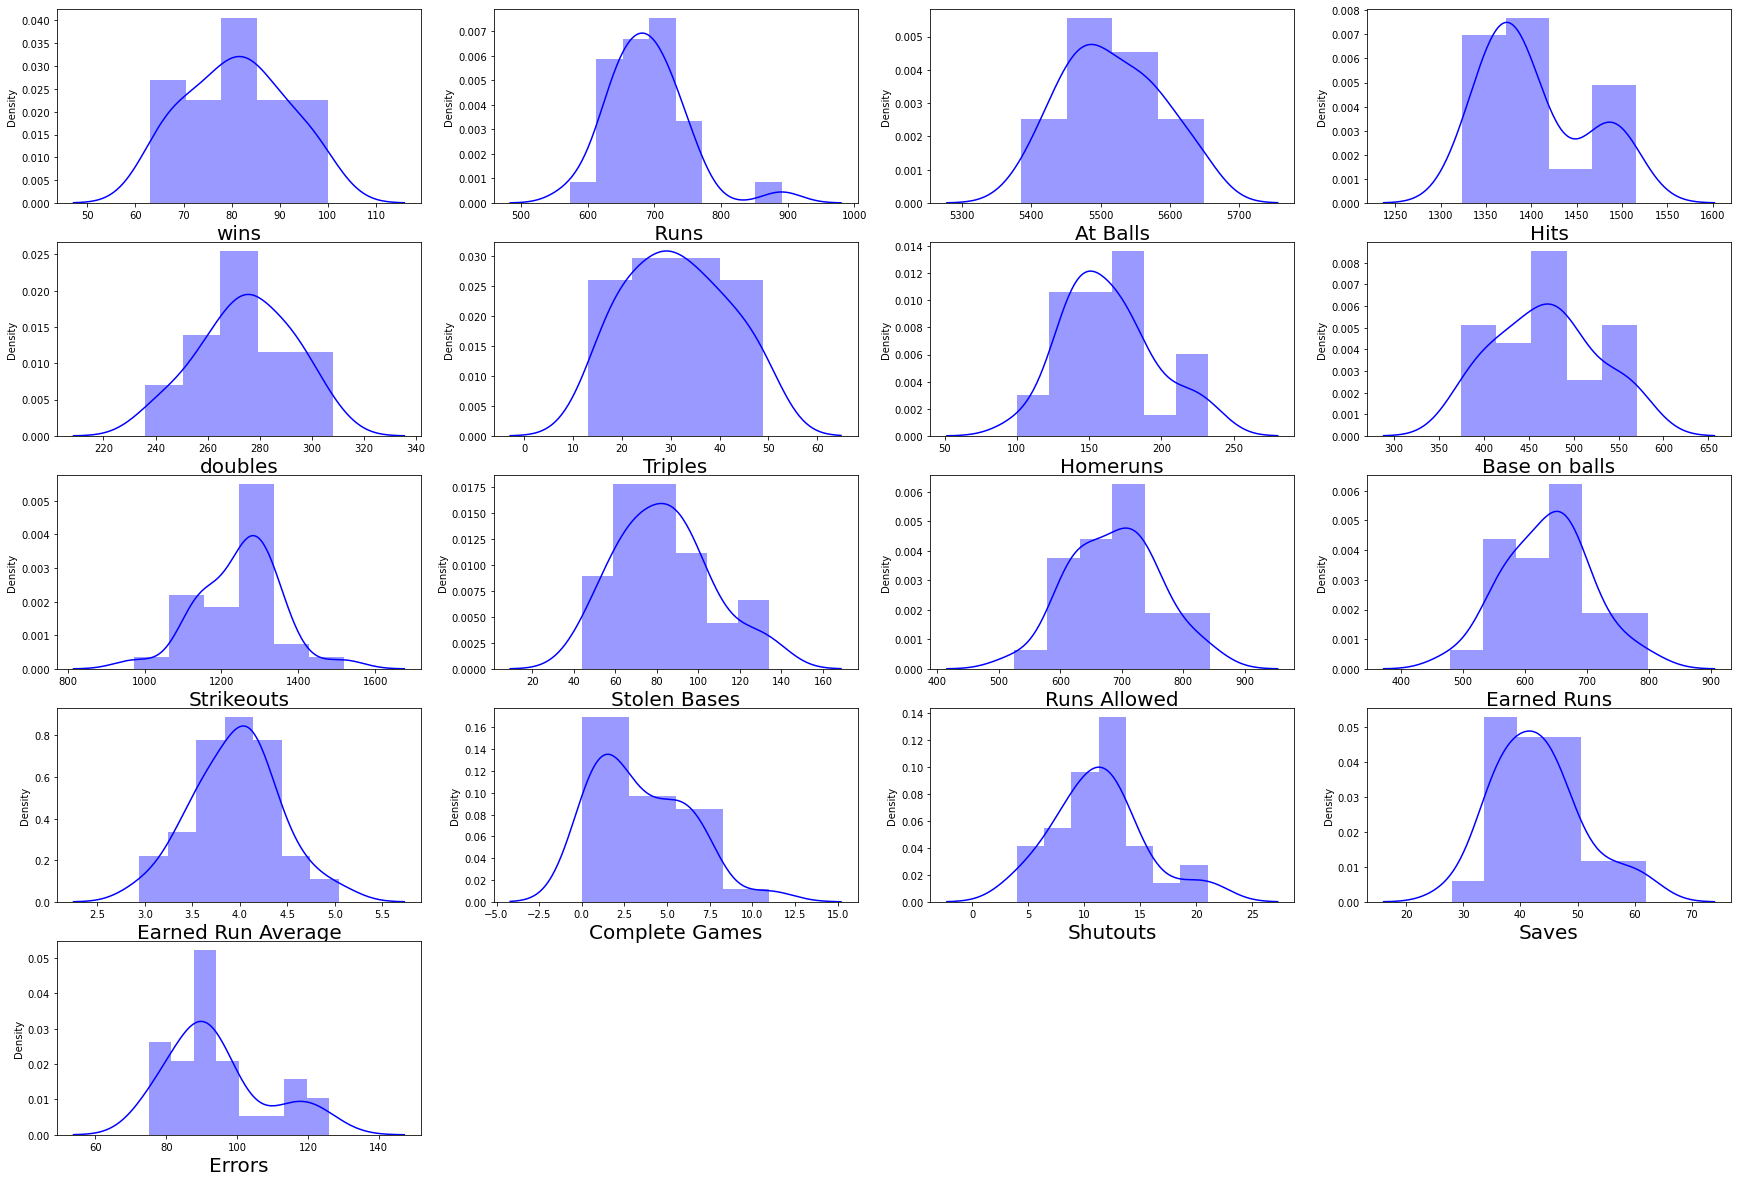

In [143]:
# checking distribution of features
# Checking how the data has been distriubted in each column
plt.figure(figsize=(30,25), facecolor='white')
plotno = 1

for column in df:
    if plotno<=18:
        a = plt.subplot(6,4,plotno)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.show()

OBSERVATIONS

Following columns are normally distributed  
1) Wins  
2) Triples  
3) Stolen Bases  
<br>
Following columns are skewed to the left 

1) Runs  
2) Doubles  
<br>
Following columns are skewed to the right  
1) Hits  
2) Homeruns  
3) Saves  
4) Errors  

In [144]:
#Checking Skewness
df.skew()

wins                  0.047089
 Runs                 1.200786
At Balls              0.183437
Hits                  0.670254
doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Base on balls         0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [145]:
#handling skewness
# we will use power transform to remove skewness from the data 
#separating target and input variable 


X=df.drop(["wins"],axis=1)
Y=df['wins']

scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [146]:
df_new=power_transform(X)

X_new=pd.DataFrame(df_new,columns=X.columns)

X_new.skew()

 Runs                 0.000000
At Balls              0.000000
Hits                  0.000000
doubles              -0.035315
Triples              -0.072933
Homeruns             -0.000065
Base on balls        -0.007760
Strikeouts            0.041170
Stolen Bases         -0.010455
Runs Allowed         -0.008082
Earned Runs          -0.001940
Earned Run Average    0.001746
Complete Games       -0.059785
Shutouts              0.006560
Saves                 0.000836
Errors                0.063909
dtype: float64

Skewness removed

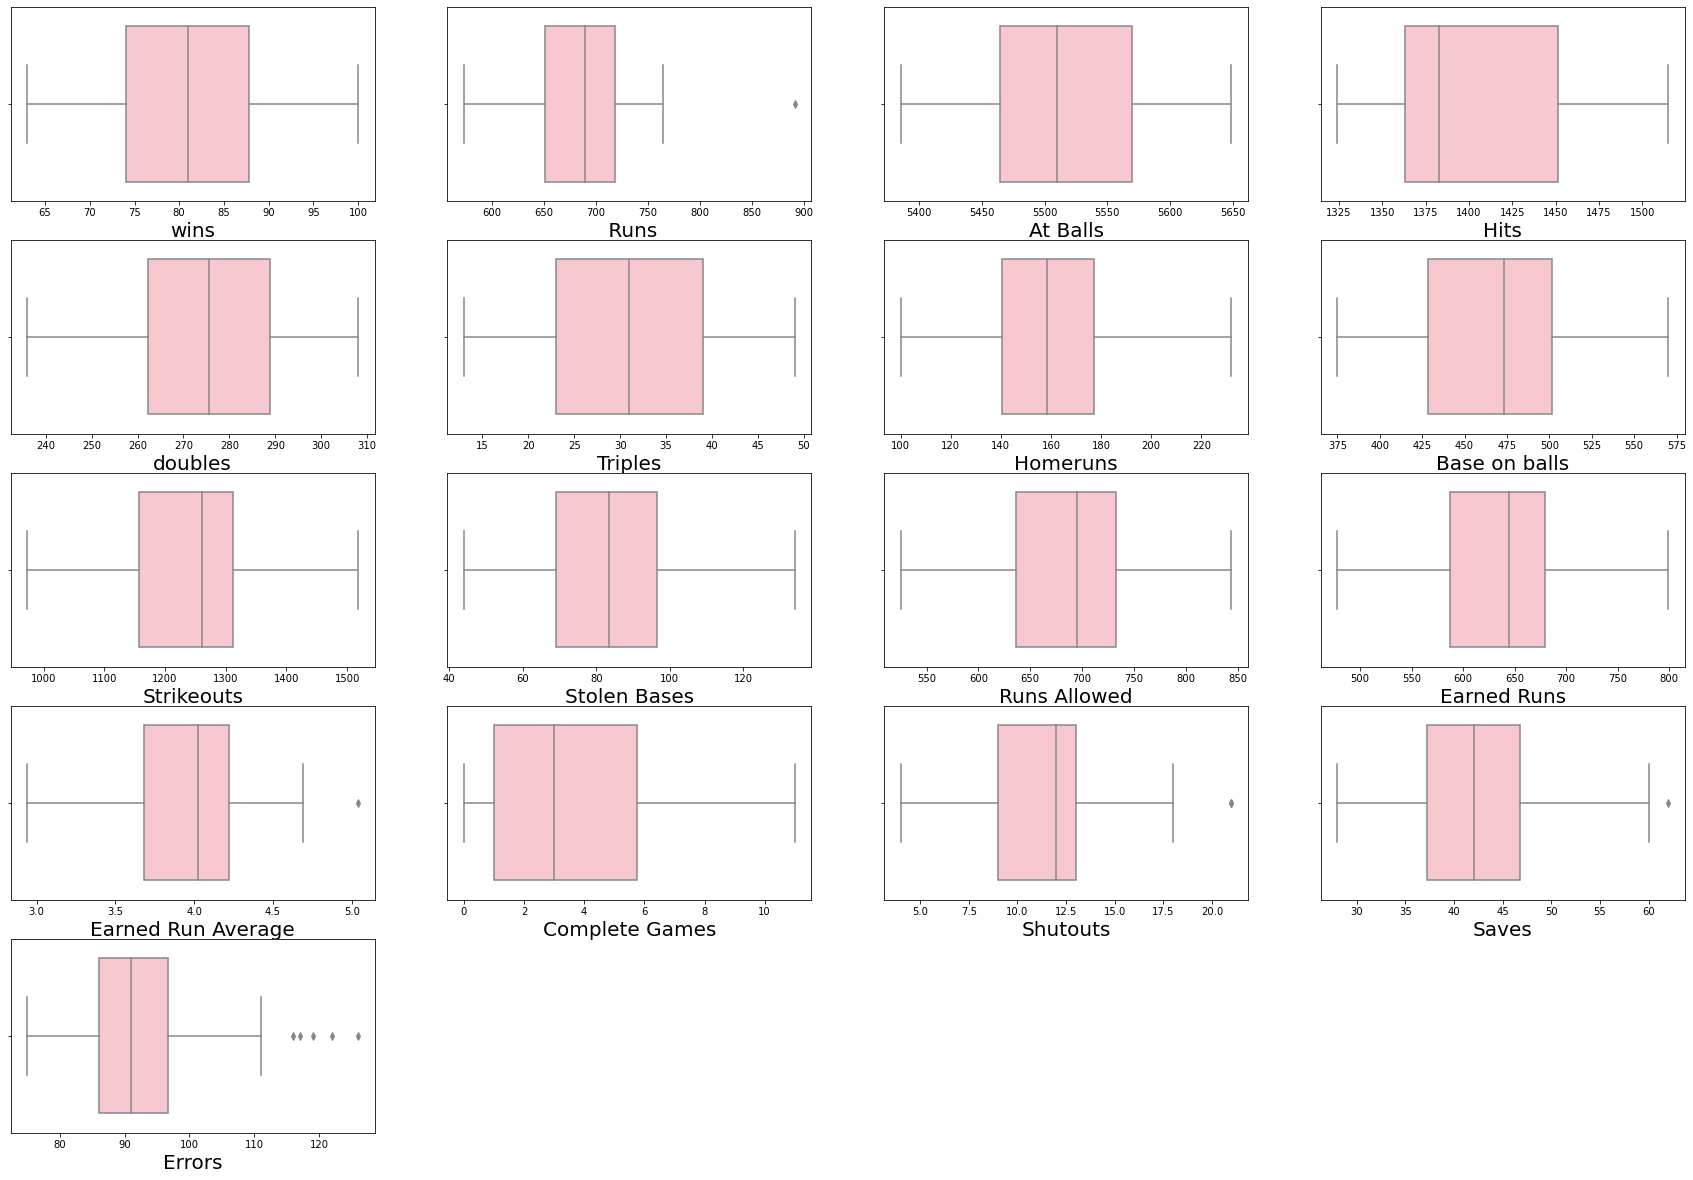

In [147]:
# Checking Outliers
plt.figure(figsize=(30,25), facecolor='white')
plotno = 1

for column in df:
    if plotno<=18:
        b = plt.subplot(6,4,plotno)
        sns.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.show()

Following columns have outliers  
1) Runs  
2) Earned Run Average  
3) Shutouts  
4) Saved  
5) Errors

In [148]:
# removing outliers using z score 

z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("before zscore: ",len(df))
print("after zscore: ",len(df_new))

before zscore:  30
after zscore:  29


In [149]:
i = df.index.difference(df_new.index)
df.drop(i,inplace = True) 

In [150]:
df

,wins,Runs,At Balls,Hits,doubles,Triples,Homeruns,Base on balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [151]:
df.shape

(29, 17)

Outliers Removed

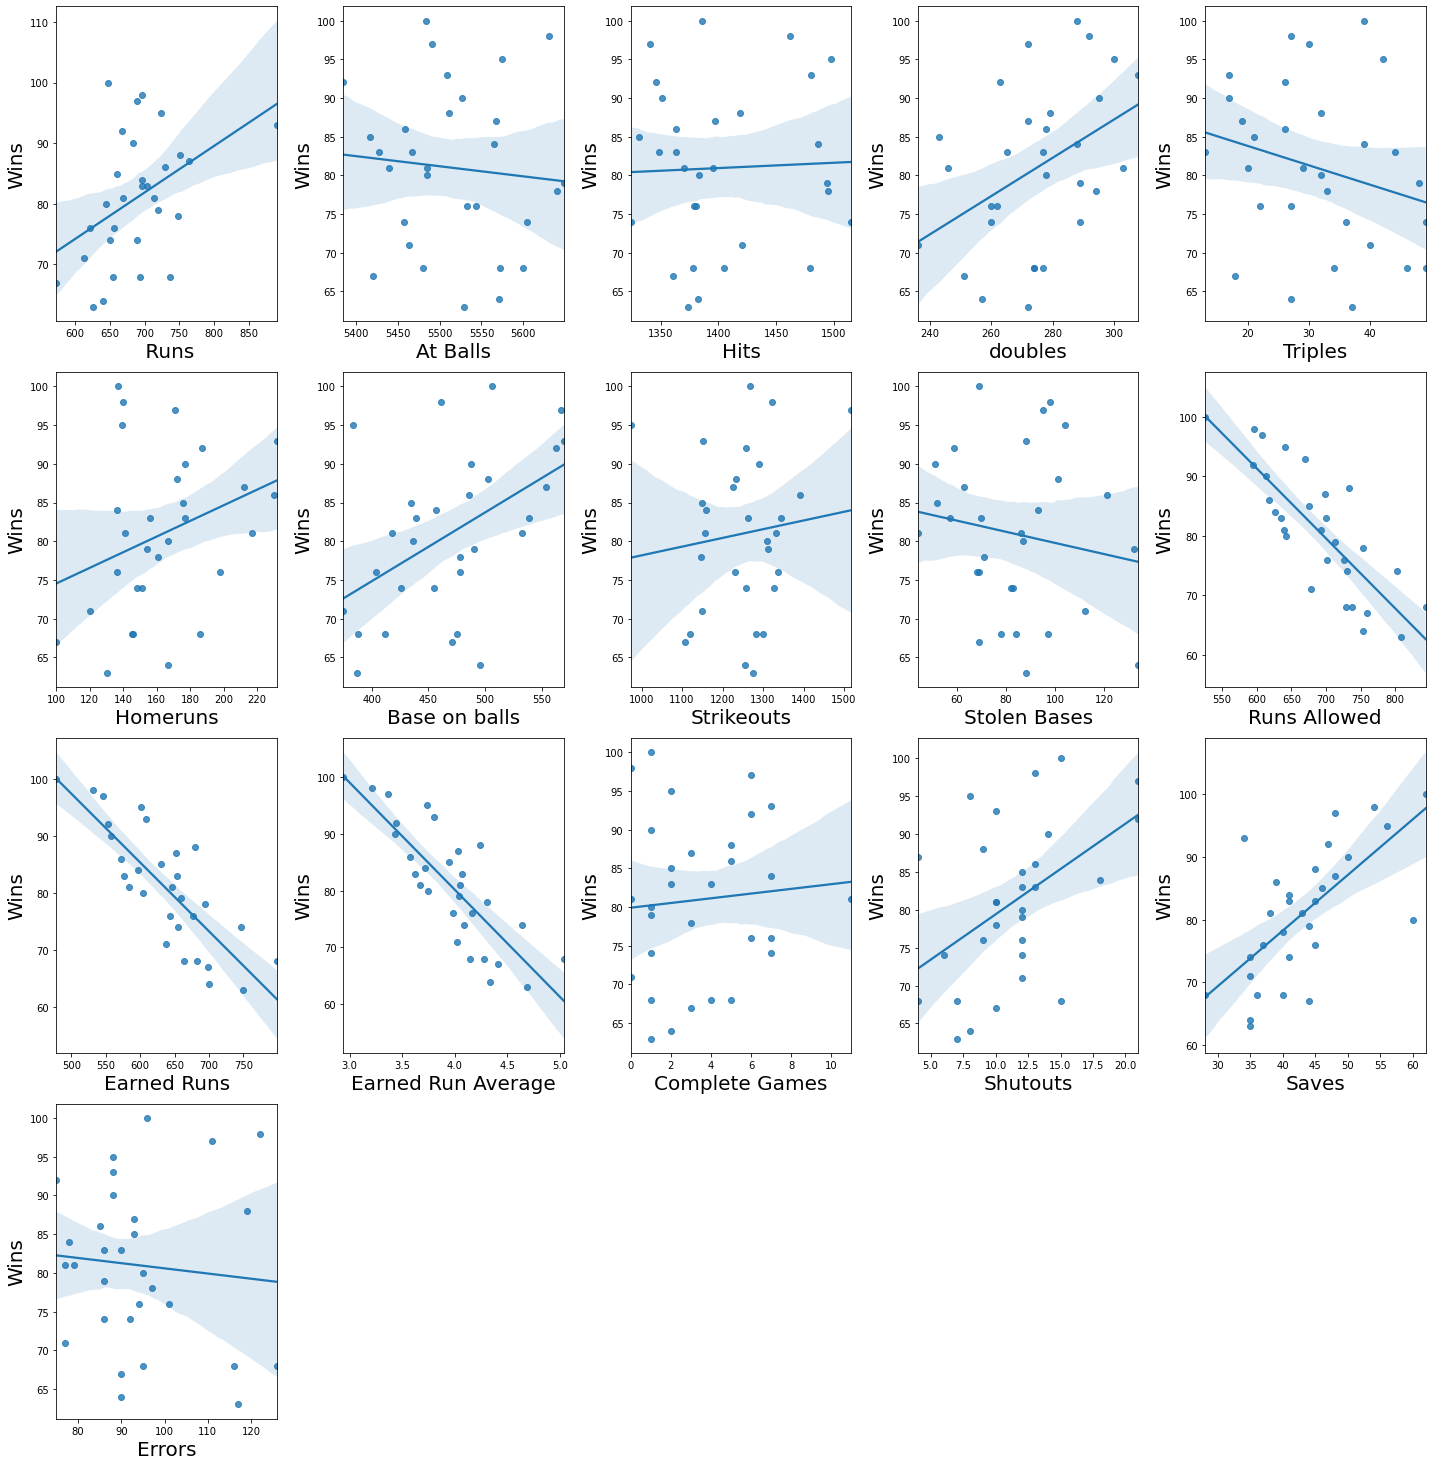

In [152]:
#Comparing target variable with other features
plt.figure(figsize=(20,25),facecolor='white')
plotno=1

for col in X:
    if plotno<=16:
        plt.subplot(5,5,plotno)
        sns.regplot(X[col],Y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotno+=1
plt.tight_layout()

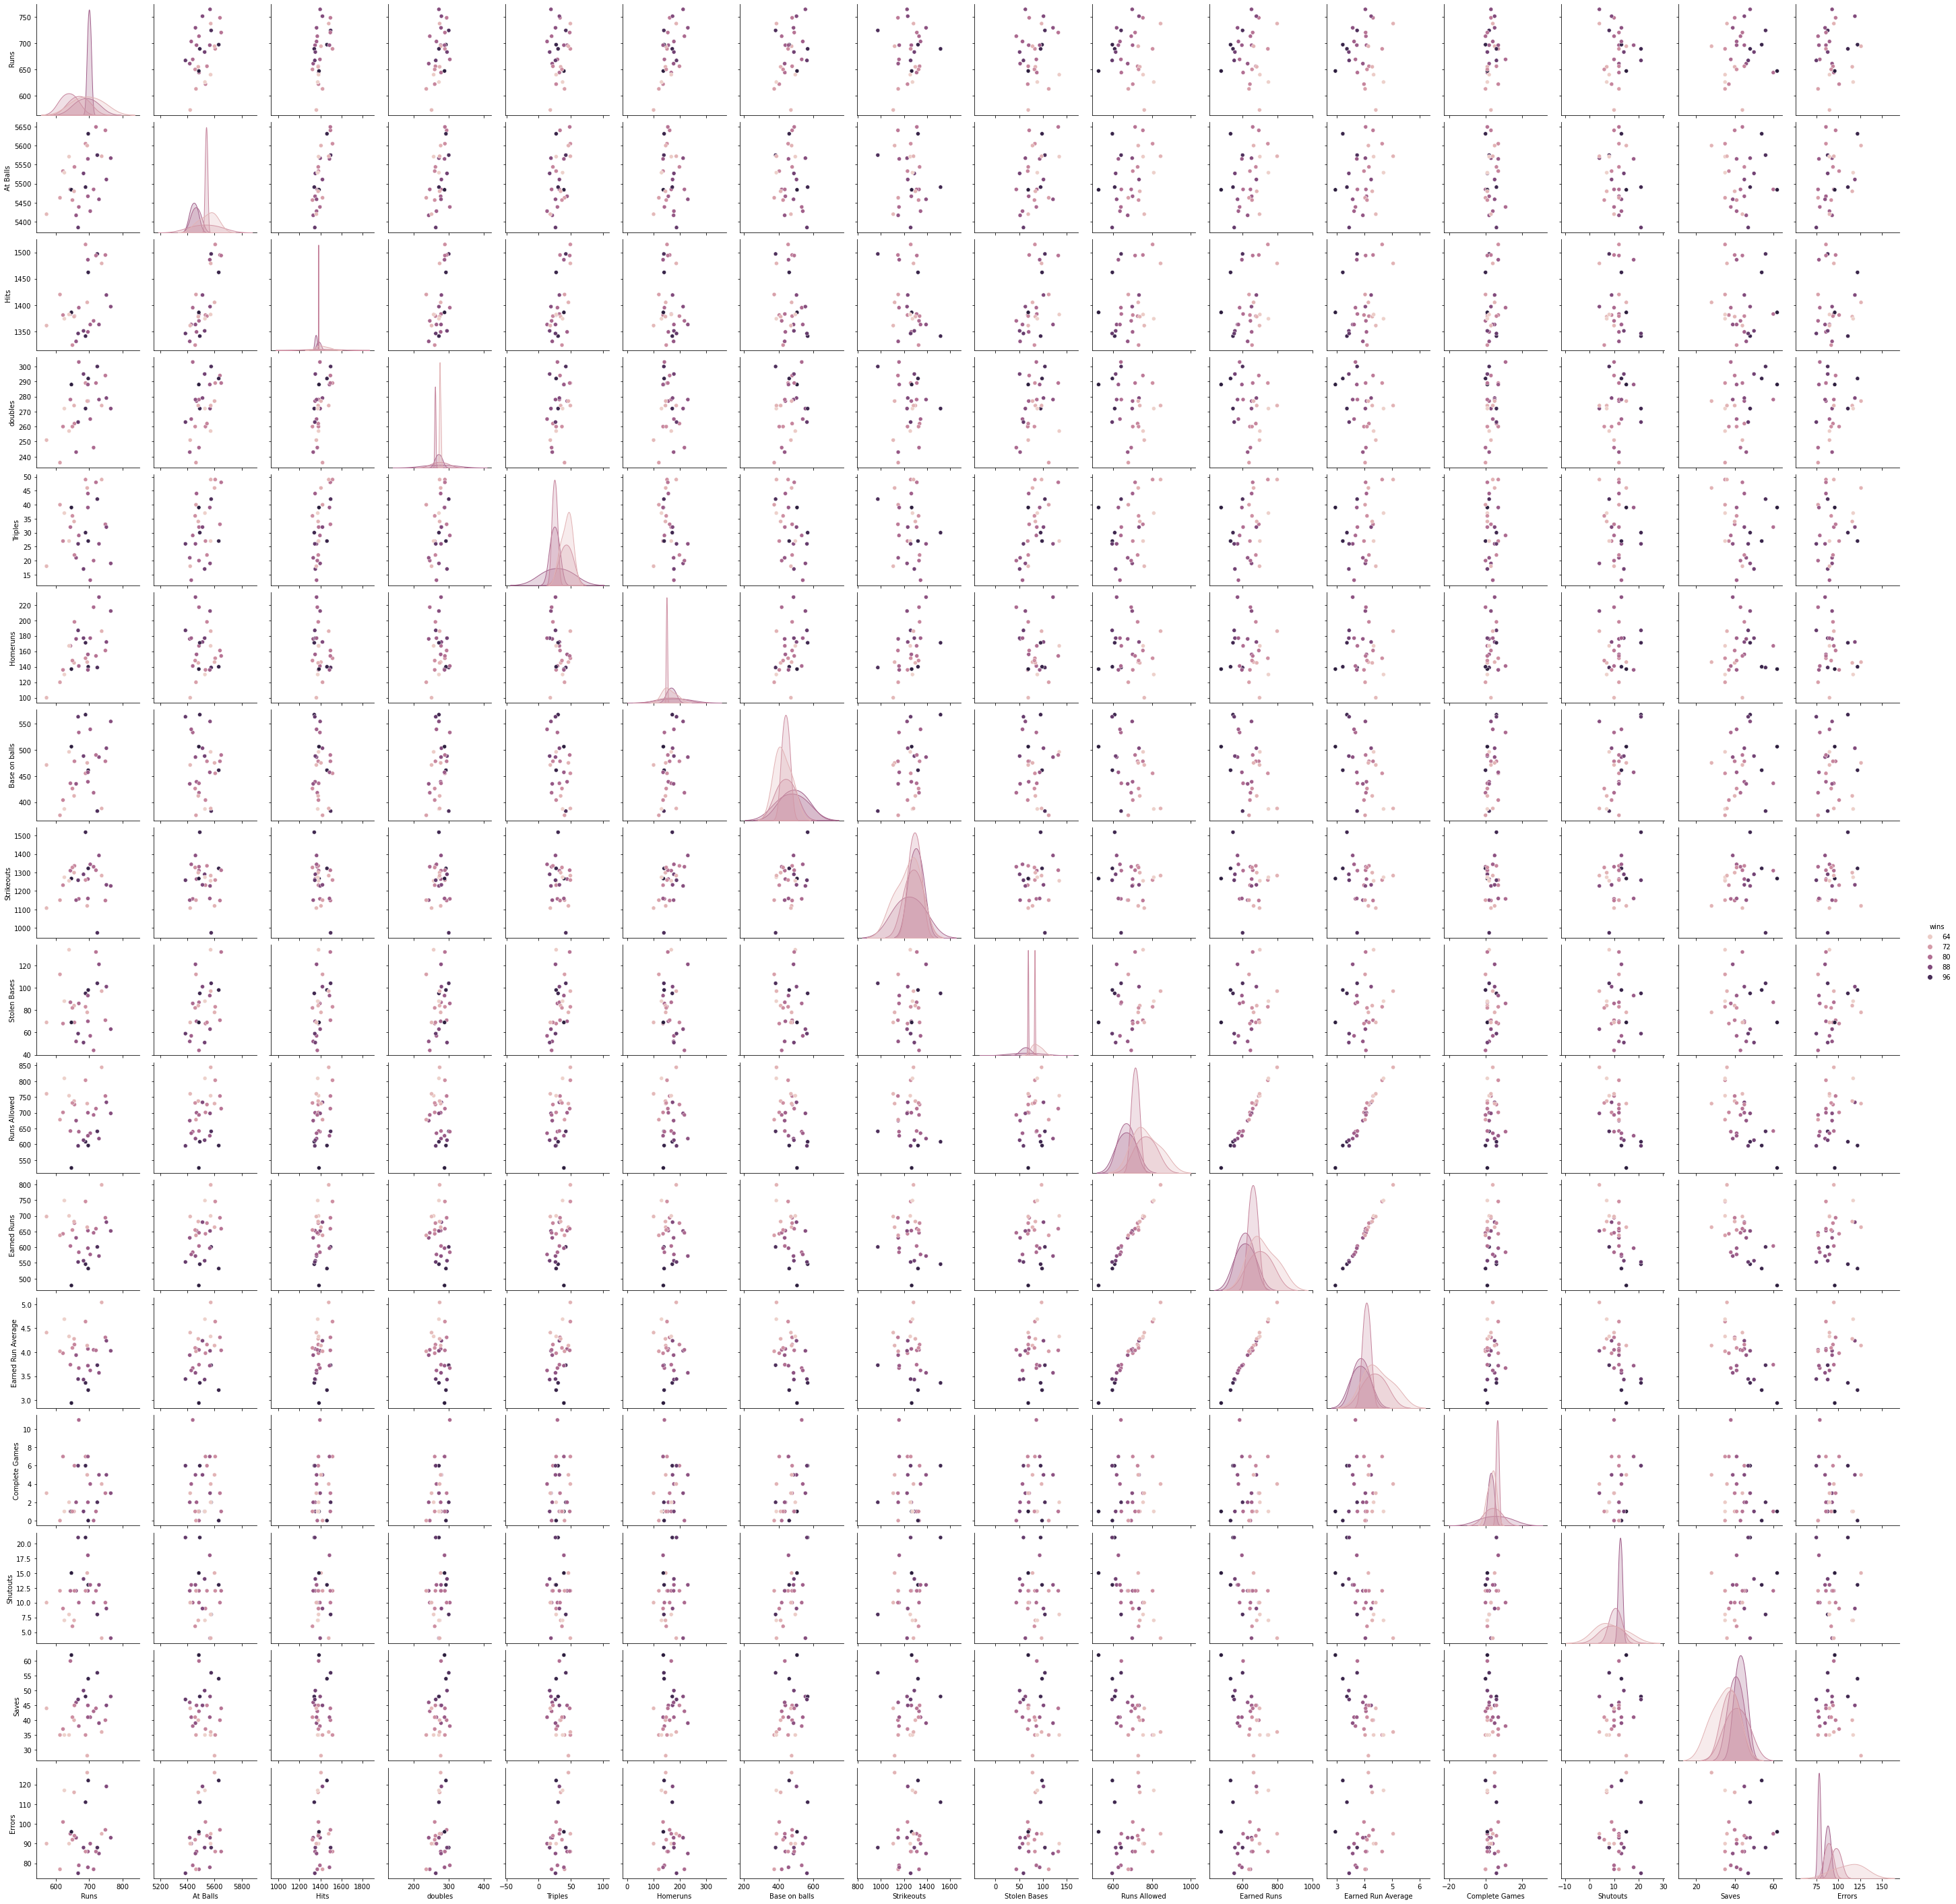

In [153]:

sns.pairplot(df,hue="wins")

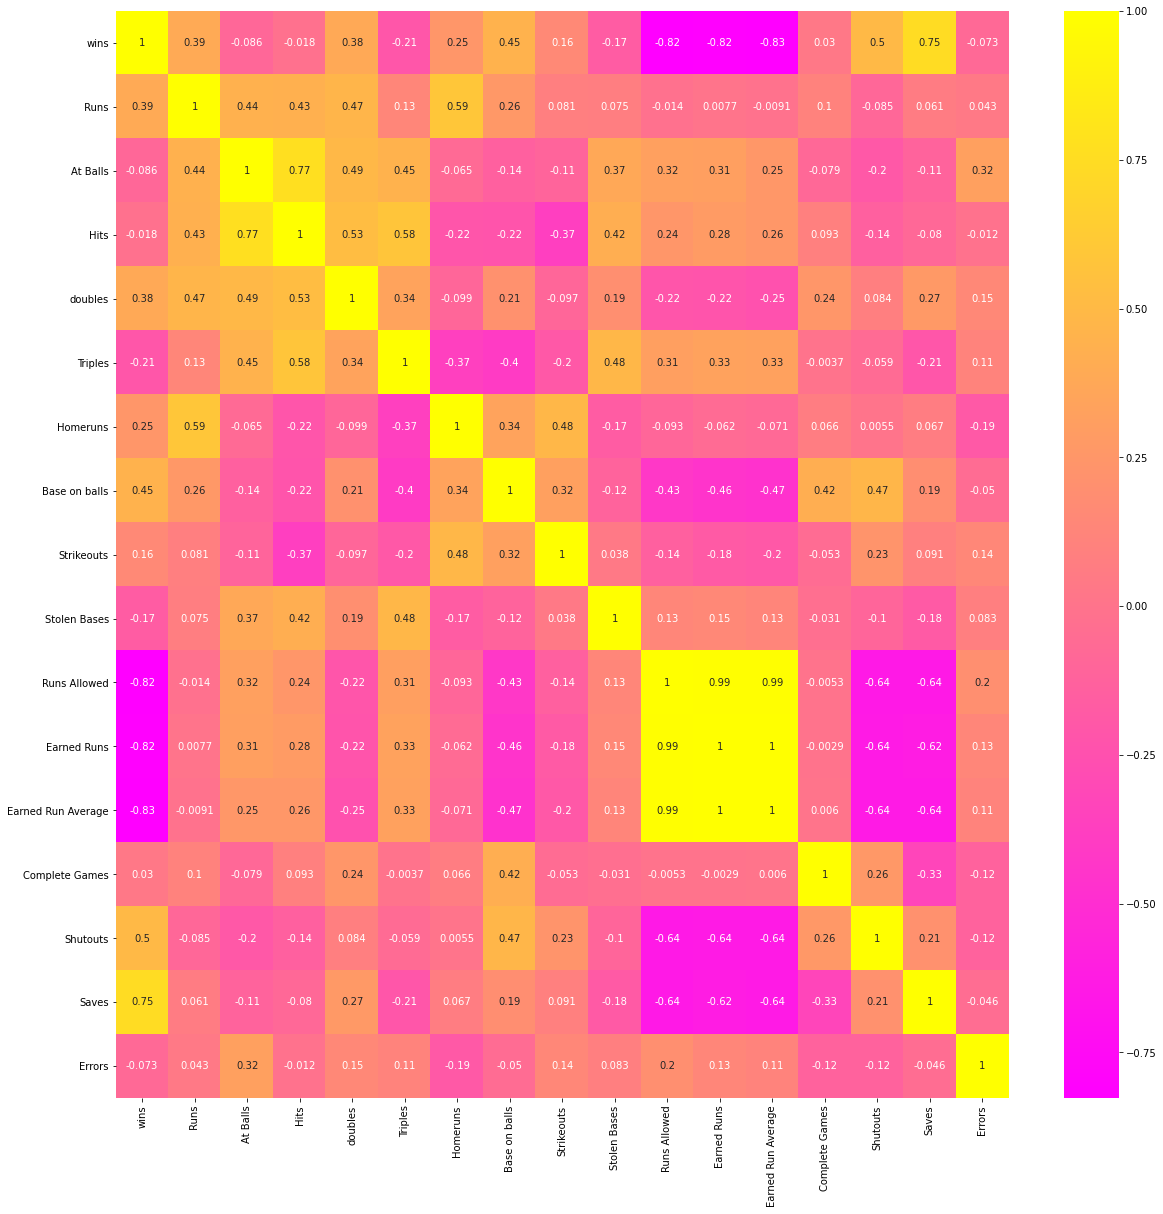

In [154]:
#checking correlation 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="spring", annot = True)
plt.yticks(rotation=0);

OBSERVATIONS  
a) wins is positively correlated with the Saves, Shutouts, Base on balls, Home runs, doubles, Runs and Strike out  
b) wins is highly negatively correlated with the features earnedruns average, earned runs and runs allowed.   
c) wins  is also negatively correlated with the features Errors, Stolen bases, Triples and At Balls.  
d) Earned runs average, Earned runs and Runs allowed are highly positively correlated with each other.

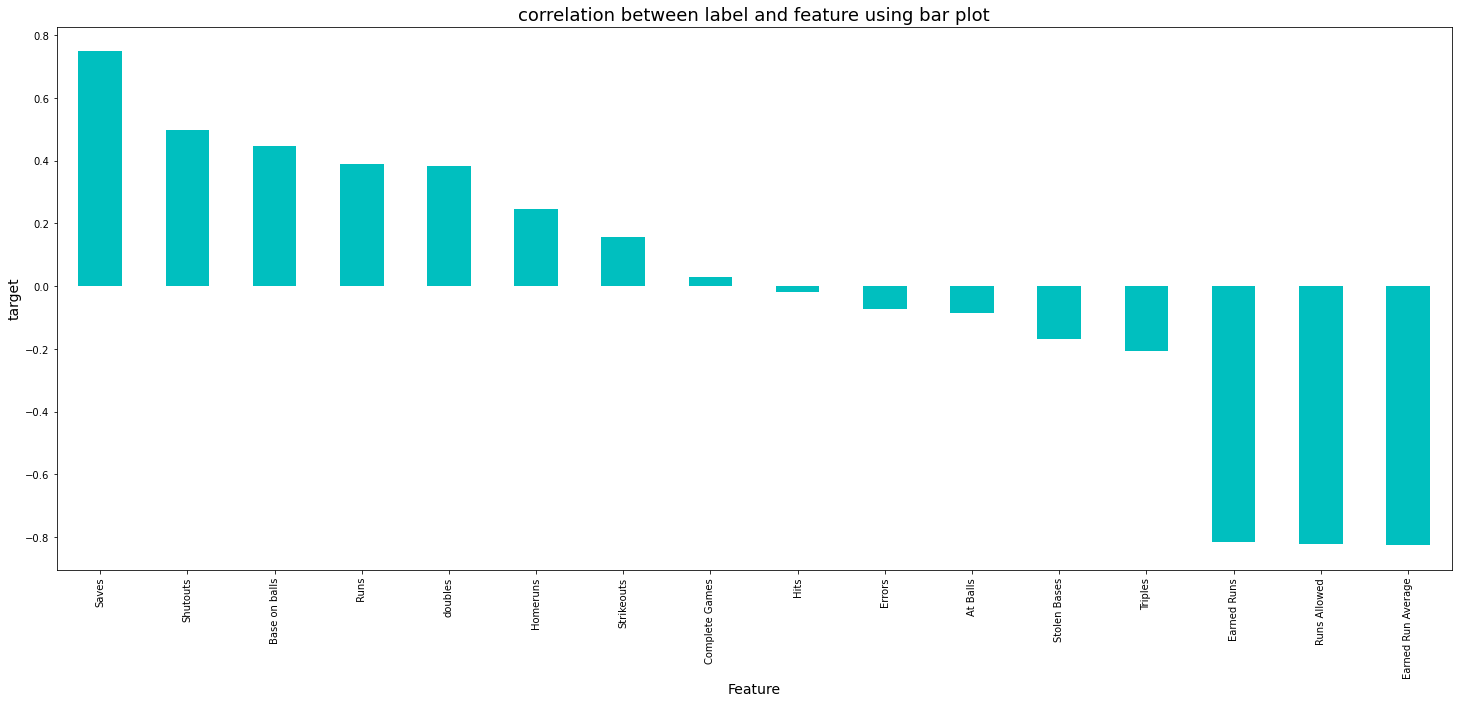

In [155]:
plt.figure(figsize=(25,10))
df.corr()['wins'].sort_values(ascending=False).drop(['wins']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [156]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Runs,At Balls,Hits,doubles,Triples,Homeruns,Base on balls,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [157]:
#checking for multi collinearity

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,11.522370,Runs
1,13.311532,At Balls
2,10.070668,Hits
3,4.019297,doubles
4,3.294146,Triples
5,10.079902,Homeruns
6,3.806098,Base on balls
7,2.652401,Strikeouts
8,2.102684,Stolen Bases
9,191.839155,Runs Allowed


Observations  
Earned run average, Runs allowed, earned runs have very high value so we will drop them

In [158]:
#Earned Run Average 
X.drop("Earned Run Average", axis=1, inplace=True)

#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns


In [159]:
vif

,VIF values,Features
0,11.375311,Runs
1,4.464580,At Balls
2,9.162137,Hits
3,3.896371,doubles
4,3.254143,Triples
5,9.741435,Homeruns
6,3.804402,Base on balls
7,2.652395,Strikeouts
8,1.895026,Stolen Bases
9,171.126556,Runs Allowed


In [160]:
X.drop("Earned Runs", axis=1, inplace=True)


In [161]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,10.791320,Runs
1,4.369242,At Balls
2,8.568511,Hits
3,3.667399,doubles
4,2.998994,Triples
5,7.586684,Homeruns
6,3.541589,Base on balls
7,2.181428,Strikeouts
8,1.844092,Stolen Bases
9,5.068366,Runs Allowed


## Step 4 - Model building

### 4.1 Finding Best Random State

In [162]:
M_acc = 0
m_RS = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc = r2_score(Y_test, pred)
    if acc > M_acc :
        M_acc = acc
        m_RS = i

print("R2 score", M_acc," random state ", m_RS)

R2 score 0.9461300959092828  random state  6


### 4.2 Train and test split

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =.30, random_state = m_RS)

### 4.3 Comapring different models for best accuracy

1. LINEAR REGRESSION

In [164]:
LR=LinearRegression()

LR.fit(X_train,Y_train)
pred_LR=LR.predict(X_test)

R2_score = r2_score(Y_test,pred_LR)

SCR=cross_val_score(LR,X,Y,cv=5)
cross_val=SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.9461300959092828
cross validation score =  0.3403737484572935


2. DECISION TREE REGRESSOR

In [165]:
DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train)
pred_DT = DT.predict(X_test)

R2_score = r2_score(Y_test,pred_DT)

SCR = cross_val_score(DT,X,Y,cv=5)
cross_val = SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.39886578449905485
cross validation score =  -2.3527819482902346


3. RANDOM FOREST REGRESSOR

In [166]:
RF = RandomForestRegressor()

RF.fit(X_train,Y_train)
pred_RF = RF.predict(X_test)

R2_score = r2_score(Y_test,pred_RF)

SCR = cross_val_score(RF,X,Y,cv=5)
cross_val = SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.5795767485822307
cross validation score =  -0.6964479227125278


4. K NEAREST NEIGHBORS REGRESSION

In [167]:
# KNeighborsRegressor


KNNR = KNeighborsRegressor(n_neighbors = 5)
KNNR.fit(X_train, Y_train)

pred_KNNR = KNNR.predict(X_test)

R2_score = r2_score(Y_test,pred_KNNR)

SCR = cross_val_score(KNNR,X,Y,cv=5)
cross_val = SCR.mean()

print("R2_score = ",R2_score)
print("cross validation score = ",cross_val)

R2_score =  0.5103213610586013
cross validation score =  -0.24136991150051418


OBSERVATION  
We will select **LINEAR REGRESSION** as it gives the best **ACCURACY**

## Step - 5 HYPER PARAMETER TUNING

In [168]:
parameters = {'fit_intercept':['True', 'False'],
               'copy_X':['True', 'False'],
              'n_jobs':[2,4,6,8,10,12],
 }

In [169]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=4)

In [170]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [2, 4, 6, 8, 10, 12]})

In [171]:
GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=2)

In [172]:
MOD = LinearRegression(copy_X='True', fit_intercept='True',n_jobs=2,normalize='True')

In [173]:
Reg=LinearRegression()
Reg.fit(X_train,Y_train)

LinearRegression()

## Step 6 Saving of Model

In [174]:
#saving LinearRegression model
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(X_train,Y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

In [175]:
LinearRegression_tree_model.score(X_train,Y_train)

0.911606201296613

In [176]:
Y_pred = Reg.predict(X_test)

In [177]:
a = np.array(Y_test)
predicted = np.array(Y_pred)
df_conclusion = pd.DataFrame({"orginal":a, "predicted":predicted})
df_conclusion

,orginal,predicted
0,95,89.775754
1,74,74.142566
2,79,81.990344
3,87,90.410116
4,97,96.896861
5,64,65.657409
6,81,82.275056
7,93,93.728749
8,71,68.951647


## Step - 7 Regularisation

In [178]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(X_train,Y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

lasso_reg.score(X_test,Y_test)

0.9267211729119549

In [179]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,Y_train)

ridgecv.alpha_

0.09099999999999998

In [180]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,Y_train)

ridge_model.score(X_test,Y_test)

0.9525764576322201